In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
!ls

sample_data  test.csv  train.csv


In [ ]:
df = pd.read_csv("train.csv")

dff = pd.read_csv('test.csv')

In [ ]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# Preprocessing

>- lower() pour enlever les maj et tout avoir au même niveau
>- PyspellChecker avec SpellCheck pour corriger les fautes et avoir le même vecteur pour 2 orthographes différentes
>- RegEx
>- convert negative for to antonyms : not good = bad
>-nLemmatization needs POS tagging use the function pos_tag() from nltk
>- from bs4 import BeautifulSoup : use to extract text from html and xlm files

In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9MB 5.7MB/s 


In [ ]:
import re
import string
from spellchecker import SpellChecker

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords #stopwords est une liste de stopwords
from nltk.corpus import wordnet

In [ ]:
#def remove_stopwords(text):
#    
#    stop_words = set(stopwords.words('en'))
#    new_text = []
#    for word in text.split():
#        if word not in stop_words:
#            new_text.append(word)
#    
#    return " ".join(new_text)
#
#test = 'i love this cat'
#test = remove_stopwords(test)
#test

In [ ]:
def correction(text):
    
    spell = SpellChecker()
    new_text = []
    unknown_word = spell.unknown(text.split())
    
    for word in text.split():
        if word in unknown_word:
            new_text.append(spell.correction(word))
        else:
            new_text.append(word)
    
    return " ".join(new_text)
 

In [ ]:
def preprocess(text):
    '''
    Preprocess les données en entrée
    
    input : string
    
    output : string modifier prêt à la vectorization
    '''
    
    
    # Enlève les majuscules
    text = text.lower()
    
    #RegEx
    
    ## remove https
    text = re.sub('https?:\/\/.*[\r\n]*', '', text)
    
    ## remove mentions
    text = re.sub(r"\@w+", '', text)
    #text = re.sub("#w+",text)
    
    ## enlève la ponctuation
    text = re.sub('[#"/\*$£€%,-:;=@§}{|>_<~]','',text)

    text = re.sub("'",'',text)
    text = re.sub('\(','',text)
    text = re.sub('\)','',text)
    
    ## enlève les doubles espaces
    text = re.sub(' +', ' ', text)
    
    ## enlève les nombres
    text = re.sub('[0-9]+','',text)
    
    #enlève la ponctuation restante
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Corrige les fautes d'orthographes
    #text = correction(text)
    
    text = " ".join(text.split())
    
    return text
    
    
    

In [ ]:
df['text'][100:115]

100    .@NorwayMFA #Bahrain police had previously die...
101    I still have not heard Church Leaders of Kenya...
102    @afterShock_DeLo scuf ps live and the game... cya
103    'The man who can drive himself further once th...
104    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yN...
105    'There is no victory at bargain basement price...
106    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...
107    'Nobody remembers who came in second.' Charles...
108    @afterShock_DeLo im speaking from someone that...
109    'The harder the conflict the more glorious the...
110    #GrowingUpSpoiled going clay pigeon shooting a...
111    So i guess no one actually wants any free Afte...
112    Aftershock was the most terrifying best roller...
113                   Aftershock https://t.co/xMWODFMtUI
114    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/M4...
Name: text, dtype: object

In [ ]:
ddd = df['text'][100:115].apply(preprocess)
ddd

100    norwaymfa bahrain police had previously died i...
101    i still have not heard church leaders of kenya...
102         aftershockdelo scuf ps live and the game cya
103    the man who can drive himself further once the...
104                                ir icemoon aftershock
105    there is no victory at bargain basement prices...
106                                ir icemoon aftershock
107    nobody remembers who came in second charles sc...
108    aftershockdelo im speaking from someone that i...
109    the harder the conflict the more glorious the ...
110    growingupspoiled going clay pigeon shooting an...
111    so i guess no one actually wants any free afte...
112    aftershock was the most terrifying best roller...
113                                           aftershock
114                                ir icemoon aftershock
Name: text, dtype: object

In [ ]:
df_train = df
df_train['text'] = df['text'].apply(preprocess)
df_train = df_train[["text", "target"]]
df_train

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in ...,1
4,just got sent this photo from ruby alaska as s...,1
...,...,...
7608,two giant cranes holding a bridge collapse int...,1
7609,ariaahrary thetawniest the out of control wild...,1
7610,m utckm s of volcano hawaii,1
7611,police investigating after an ebike collided w...,1


In [ ]:
#df_train, df_val = train_test_split(df, test_size=0.20)

In [ ]:
df_train

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in ...,1
4,just got sent this photo from ruby alaska as s...,1
...,...,...
7608,two giant cranes holding a bridge collapse int...,1
7609,ariaahrary thetawniest the out of control wild...,1
7610,m utckm s of volcano hawaii,1
7611,police investigating after an ebike collided w...,1


In [ ]:
#df_val

In [ ]:
df_test = dff
df_test['text'] = dff['text'].apply(preprocess)
df_test

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles ûò safety faste...
3259,10865,NaN,NaN,storm in ri worse than last hurricane my citya...
3260,10868,NaN,NaN,green line derailment in chicago
3261,10874,NaN,NaN,meg issues hazardous weather outlook hwo


In [ ]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
texts = df_train.text.values
labels = df_train.target.values

# BERT Model

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 5.8MB/s 
     |████████████████████████████████| 1.1MB 31.6MB/s 
     |████████████████████████████████| 890kB 42.4MB/s 
     |████████████████████████████████| 2.9MB 44.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=ab8a10bc9f4d4af0cc3d7ed313a40a220337e7ef57ff0f7320f9cf39def913d5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertForSequenceClassification: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['dropout_37', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

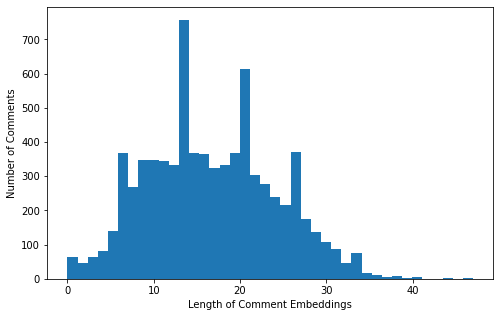

In [ ]:
def plot_sentence_embeddings_length(text_list, tokenizer):
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t), text_list))
    tokenized_texts_len = list(map(lambda t: len(t), tokenized_texts))
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.hist(tokenized_texts_len, bins=40);
    ax.set_xlabel("Length of Comment Embeddings");
    ax.set_ylabel("Number of Comments");
    return
plot_sentence_embeddings_length(texts, tokenizer)


In [ ]:
indices = tokenizer.batch_encode_plus(texts,
                                    max_length=64, # max length of the text that can go to BERT
                                    add_special_tokens=True, # add [CLS], [SEP]
                                    return_attention_mask=True, # add attention mask to not focus on pad tokens
                                    pad_to_max_length=True, # add [PAD] tokens
                                    truncation=True)


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
indices.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
input_ids = indices["input_ids"] # liste de liste

In [ ]:
token_type_ids = indices["token_type_ids"] # liste de liste

In [ ]:
attention_masks = indices["attention_mask"] # liste de liste

In [ ]:
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.2)

train_masks, val_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.2)

token_type_ids_train, token_type_ids_val, _, _ = train_test_split(token_type_ids, labels,
                                             random_state=42, test_size=0.2)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    {"train_inputs" : train_inputs,
     "token_type_ids" : token_type_ids_train,
     "train_masks" : train_masks},
    train_labels))

val_dataset = tf.data.Dataset.from_tensor_slices((
    {"val_inputs" : val_inputs,
     "token_type_ids" : token_type_ids_val,
     "val_masks" : val_masks},
    val_labels))

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

def encode_examples(text, token, mask, label):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  
    
  for tweet, token_type, attention_mask,label in zip(text, token, mask, label):
    #bert_input = convert_example_to_feature(review.decode())
  
    input_ids_list.append(tweet)
    token_type_ids_list.append(token_type)
    attention_mask_list.append(attention_mask)
    label_list.append(label)
  return tf.data.Dataset.from_tensor_slices((input_ids_list,
                                             attention_mask_list,
                                             token_type_ids_list,
                                             label_list)).map(map_example_to_dict)


In [ ]:
batch_size = 32
ds = encode_examples(train_inputs, token_type_ids_train,
                                   train_masks, train_labels).shuffle(10000).batch(batch_size)

val_ds = encode_examples(val_inputs, token_type_ids_val,
                                   val_masks, val_labels).shuffle(10000).batch(batch_size)
#ds_test_encoded = encode_examples(ds_test).batch(batch_size)

In [ ]:
ds

<BatchDataset shapes: ({input_ids: (None, 64), token_type_ids: (None, 64), attention_mask: (None, 64)}, (None,)), types: ({input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [ ]:
print((next(iter(train_dataset))))
print('')
print('')
print('')
#print((next(iter(ds_bis))))

({'train_inputs': <tf.Tensor: shape=(64,), dtype=int32, numpy=
array([  101, 26103,  1998,  7481,  4106,  1997,  2342,  2000,  2224,
        9593,  5968,  1999, 20168,  2887,  2510,  4188,  7806,   102,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(64,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)>, 'train_masks': <tf.Tensor: shape=(64,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
!pip install -q tf-models-official==2.3.0

     |████████████████████████████████| 849kB 5.5MB/s 
     |████████████████████████████████| 102kB 11.9MB/s 
     |████████████████████████████████| 36.7MB 91kB/s 
     |████████████████████████████████| 358kB 53.9MB/s 
     |████████████████████████████████| 174kB 61.2MB/s 


In [ ]:
from official import nlp
import official.nlp.optimization

In [ ]:
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5



# we will do just 1 epoch for illustration, though multiple epochs 
# might be better as long as we will not overfit the model
number_of_epochs = 5




# model initialization

# optimizer Adam recommended
optimizer_classic = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)


train_data_size = len(train_labels)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * number_of_epochs
warmup_steps = int(number_of_epochs * train_data_size * 0.1 / batch_size)

# creates an optimizer with learning rate schedule
optimizer_upgrade = nlp.optimization.create_optimizer(
    2e-5, num_train_steps = num_train_steps,
    num_warmup_steps = warmup_steps)




# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

#model_classic.compile(optimizer=optimizer_classic, loss=loss, metrics=[metric])

model.compile(optimizer=optimizer_upgrade, loss=loss, metrics=[metric])


INFO:absl:using Adamw optimizer


# Entraînements

> - 3 cas de figures : 
>> - on donne le train DS avec from_tensor_slices() sans dictionaire et on a un problème de shape
>> - on donne le train DS avec from_tensor_slices() avec dictionnaire et on à l'erreur "ValueError: You have to specify either input_ids or inputs_embeds"
>> - On donne séparément les train_inputs et les train_labels et ça fonctionne 

> - solution faire une liste de liste

### Optimiseur Adam

In [ ]:
bert_history_classic = model_classic.fit(ds, epochs=number_of_epochs, validation_data = val_ds)

NameError: ignored

### Optimiseur Adam upgrade

In [ ]:
bert_history = model.fit(ds, epochs=number_of_epochs, validation_data = val_ds)

Epoch 1/5
191/191 [==============================] - 55s 290ms/step - loss: 0.5270 - accuracy: 0.7289 - val_loss: 0.4141 - val_accuracy: 0.8273
Epoch 2/5
191/191 [==============================] - 53s 277ms/step - loss: 0.3534 - accuracy: 0.8568 - val_loss: 0.4549 - val_accuracy: 0.7971
Epoch 3/5
191/191 [==============================] - 53s 276ms/step - loss: 0.2686 - accuracy: 0.8957 - val_loss: 0.4201 - val_accuracy: 0.8280
Epoch 4/5
191/191 [==============================] - 53s 277ms/step - loss: 0.1959 - accuracy: 0.9279 - val_loss: 0.5033 - val_accuracy: 0.8201
Epoch 5/5
191/191 [==============================] - 53s 277ms/step - loss: 0.1579 - accuracy: 0.9425 - val_loss: 0.5279 - val_accuracy: 0.8234


In [ ]:
bert_history = model.fit(train_dataset, epochs=number_of_epochs, validation_data=val_dataset)

Epoch 1/2


ValueError: ignored

# Submission

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
df_test['text'] = df_test['text'].apply(preprocess)
df_test = df_test[["id","text"]]
df_test

,id,text
0,0,just happened a terrible car crash
1,2,heard about earthquake is different cities sta...
2,3,there is a forest fire at spot pond geese are ...
3,9,apocalypse lighting spokane wildfires
4,11,typhoon soudelor kills in china and taiwan
...,...,...
3258,10861,earthquake safety los angeles ûò safety faste...
3259,10865,storm in ri worse than last hurricane my citya...
3260,10868,green line derailment in chicago
3261,10874,meg issues hazardous weather outlook hwo


In [ ]:
indices_test = tokenizer.batch_encode_plus(df_test.text.values,
                                    max_length=64, # max length of the text that can go to BERT
                                    add_special_tokens=True, # add [CLS], [SEP]
                                    return_attention_mask=True, # add attention mask to not focus on pad tokens
                                    pad_to_max_length=True, # add [PAD] tokens
                                    truncation=True)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids_test = indices_test["input_ids"]
token_type_ids_test = indices_test["token_type_ids"] # liste de liste
attention_masks_test = indices_test["attention_mask"] # liste de liste

In [ ]:
def map_example_to_dict_test(input_ids, attention_masks):
  return {
      "input_ids": input_ids,
      "attention_mask": attention_masks,
  }

def encode_examples_test(text, mask):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  attention_mask_list = []
      
  for tweet, attention_mask in zip(text, mask):
  
    input_ids_list.append(tweet)
    attention_mask_list.append(attention_mask)
  
  return tf.data.Dataset.from_tensor_slices(([input_ids_list],
                                             [attention_mask_list]
                                             )).map(map_example_to_dict_test)


In [ ]:
print(len(input_ids_test))
print(len(attention_masks_test))

3263
3263


In [ ]:
ds_test = encode_examples_test(input_ids_test, attention_masks_test)

ds_test

<MapDataset shapes: {input_ids: (3263, 64), attention_mask: (3263, 64)}, types: {input_ids: tf.int32, attention_mask: tf.int32}>

In [ ]:
# le max len dans indices influences la taille des predictions

prediction = model.predict(ds_test)

In [ ]:
prediction = prediction[0]

In [ ]:
prediction.shape

(3263, 2)

In [ ]:
len(prediction[0])/3263

0.0006129328838492185

In [ ]:
#flat_predictions = [item for sublist in prediction for item in sublist]
flat_predictions = np.argmax(prediction, axis = 1)#.flatten()

In [ ]:
c=0
for item in flat_predictions:
  if item == 0:
    c+=1
c

1932

In [ ]:
df_test['target']

In [ ]:
submit = pd.DataFrame({'id':list(df_test['id']),
                     'target':flat_predictions})
submit.to_csv('submission.csv', index = False)

In [ ]:
pd.read_csv('submission.csv')

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
